In [1]:
#File Imports
#import files
'''
Matplotlib Library is used to create visualisations in python
Pandas Library is used dor Data Manipulation & Analysis
Pickle Library is used to serialize and de-serialize object structure in python
CSV library is used to read and write tabular data in csv
#seaborn is used to visualize data

'''
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle 
import csv 
import seaborn as sns 

In [2]:
# Step1: Creating a SchoolApplication class with constructors & attributes
class SchoolApplication:
    #(__init__) Initializing the attributes
    def __init__(self, date, name, school, type, rating, tuition_fee, acceptance_rate):
        self.date = date
        self.name = name
        self.school = school
        self.type = type
        self.rating = rating
        self.tuition_fee = tuition_fee
        self.acceptance_rate = acceptance_rate
        #Step 2:
        self.unique_id = id(self)
    # Step 3: 
    def __str__(self):
        return f"{self.unique_id},{self.date},{self.name},{self.school},{self.type},{self.rating},{self.tuition_fee},{self.acceptance_rate}"
#Step 4 & 5
class StemSchoolApplication(SchoolApplication):
    def __init__(self, date, name, school, rating, tuition_fee, acceptance_rate):
        super().__init__(date, name, school, "Stem", rating, tuition_fee, acceptance_rate)

class NonStemSchoolApplication(SchoolApplication):
    def __init__(self, date, name, school, rating, tuition_fee, acceptance_rate):
        super().__init__(date, name, school, "non-Stem", rating, tuition_fee, acceptance_rate)
#Step 6 & 7:
class Caltech(StemSchoolApplication):
    def __init__(self, date, name, rating, tuition_fee, acceptance_rate):
        super().__init__(date, name, "Caltech", rating, tuition_fee, acceptance_rate)

class Wharton(NonStemSchoolApplication):
    def __init__(self, date, name, rating, tuition_fee, acceptance_rate):
        super().__init__(date, name, "Wharton", rating, tuition_fee, acceptance_rate)

class Yale(NonStemSchoolApplication):
    def __init__(self, date, name, rating, tuition_fee, acceptance_rate):
        super().__init__(date, name, "Yale", rating, tuition_fee, acceptance_rate)


# Step 8:
WhartonSchoolApplication = Wharton("2022-11-15", "nameA", 2, 641, 86.06)
print(str(WhartonSchoolApplication))



2287913189536,2022-11-15,nameA,Wharton,non-Stem,2,641,86.06


In [3]:
#Step 9
with open('SchoolApplicationpkl303.dat', 'rb') as fb:
    try:
        while (True):
            objects = pickle.load(fb)
            print(objects[0])
    except EOFError:
        pass

134289269037264,2022-11-17,CS6382,Caltech,Stem,2,23188,78.05


In [4]:
#Step 10:
with open('schooldata_t3.csv', 'w') as f:
    f.write("uniqueId,date,name,school,type,rating,tuition_fee,acceptance_rate\n")
    for obj in objects:
        f.write(str(obj)+'\n')

In [5]:
#Step 11: Reading csv data
schooldata = pd.read_csv('schooldata_t3.csv')
schooldata


,uniqueId,date,name,school,type,rating,tuition_fee,acceptance_rate
0,134289269037264,2022-11-17,CS6382,Caltech,Stem,2.0,23188.0,78.05
1,134289269031744,2022-09-09,LAW342,Wharton,non-Stem,2.0,18692.0,82.22
2,134289269031168,2022-12-05,MAN6332,Yale,non-Stem,1.0,17841.0,77.71
3,134289269037552,2022-10-12,MAN6332,Yale,non-Stem,4.0,26157.0,85.61
4,134289269036352,2022-11-28,MAN6382,Yale,non-Stem,1.0,28098.0,91.63
...,...,...,...,...,...,...,...,...
9995,134289270159824,2022-11-03,CS6332,Caltech,Stem,2.0,26123.0,76.41
9996,134289270159872,2022-09-07,LAW302,Wharton,non-Stem,2.0,24852.0,65.46
9997,134289270159920,2022-08-18,CS6382,Caltech,Stem,1.0,20908.0,73.85
9998,134289270159968,2022-12-28,MAN6332,Yale,non-Stem,2.0,20113.0,80.66


In [6]:
schooldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uniqueId         10000 non-null  int64  
 1   date             9562 non-null   object 
 2   name             10000 non-null  object 
 3   school           10000 non-null  object 
 4   type             10000 non-null  object 
 5   rating           9546 non-null   float64
 6   tuition_fee      9565 non-null   float64
 7   acceptance_rate  9571 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


In [8]:
schooldata.isna().sum()

uniqueId             0
date               438
name                 0
school               0
type                 0
rating             454
tuition_fee        435
acceptance_rate    429
dtype: int64

In [9]:
'''
#Techniques covered to deal with missing data:
a. Replacing around 438,454 lines of Null data with mode for categorical data like Rating & Date
b. Replacing around 435,429 lines of Null data with mode for numerical/discrete data like Tuition Fee & Acceptance Rate

'''

print(schooldata['date'].mode()[0])
print(schooldata['rating'].mode()[0])
print(schooldata['tuition_fee'].mode()[0])
print(schooldata['acceptance_rate'].mode()[0])

2022-12-29
2.0
19975.0
77.18


In [10]:
print(schooldata.columns)

Index(['uniqueId', 'date', 'name', 'school', 'type', 'rating', 'tuition_fee',
       'acceptance_rate'],
      dtype='object')


In [11]:
#Replacing categorical values in  with mode of the other values for Null rows
cols = ['date', 'rating',]
for column in cols:
    schooldata[column].fillna(schooldata[column].mode()[0], inplace = True)

In [14]:
#Replacing numerical values in  with mode of the other values for Null rows
cols = ['tuition_fee', 'acceptance_rate',]
for column in cols:
    schooldata[column].fillna(schooldata[column].mean(), inplace = True)

In [15]:
schooldata.isna().sum()
schooldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uniqueId         10000 non-null  int64  
 1   date             10000 non-null  object 
 2   name             10000 non-null  object 
 3   school           10000 non-null  object 
 4   type             10000 non-null  object 
 5   rating           10000 non-null  float64
 6   tuition_fee      10000 non-null  float64
 7   acceptance_rate  10000 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


In [16]:
#Data Categorised based on School Name
wharton_data = schooldata[schooldata['school'] == 'Wharton']
caltech_data = schooldata[schooldata['school'] == 'Caltech']
yale_data = schooldata[schooldata['school'] == 'Yale']

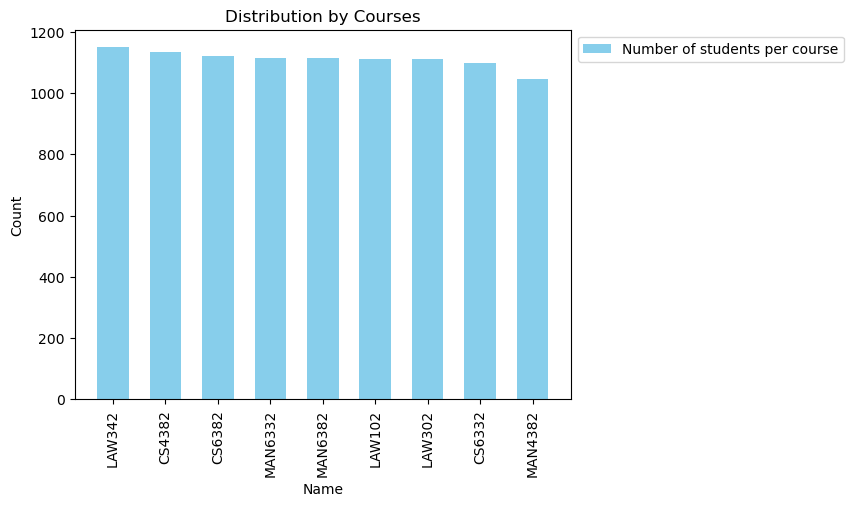

In [17]:
#1A: Bar chart
school_count = schooldata['name'].value_counts()
width = 0.40
plt.bar(school_count.index, school_count.values, color='skyblue',width = 0.6,label = 'Number of students per course')
plt.xlabel('Name') 
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Distribution by Courses')

plt.show()

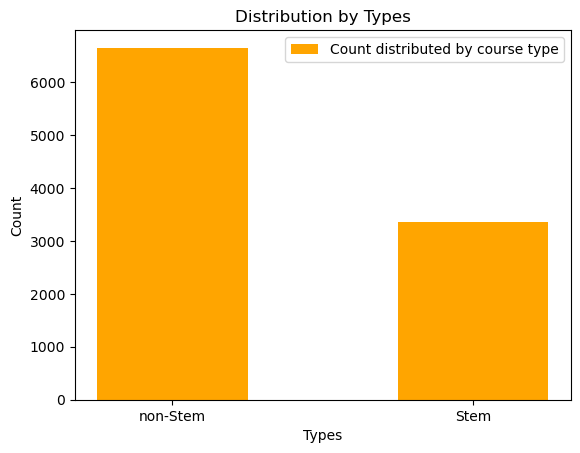

In [19]:
#1B: Bar chart
'''
In our analysis of a dataset comprising 10,000 records, we focused on creating a data visualization in the form of a bar chart. The key objective was to explore the distribution of applocations across STEM and non-STEM courses. 
The visualization revealed that out of the total applications, 6,700 were applied for STEM courses, while 3,300 were non-STEM courses. 
This straightforward representation provides a clear and concise overview of the enrollment distribution between these two educational streams within the dataset.

'''


school_count = schooldata['type'].value_counts()
width = 0.40
plt.bar(school_count.index, school_count.values, color='orange',width = 0.50, label = 'Count distributed by course type')
plt.xlabel('Types')
plt.ylabel('Count')
plt.title('Distribution by Types')
plt.legend()
plt.show()

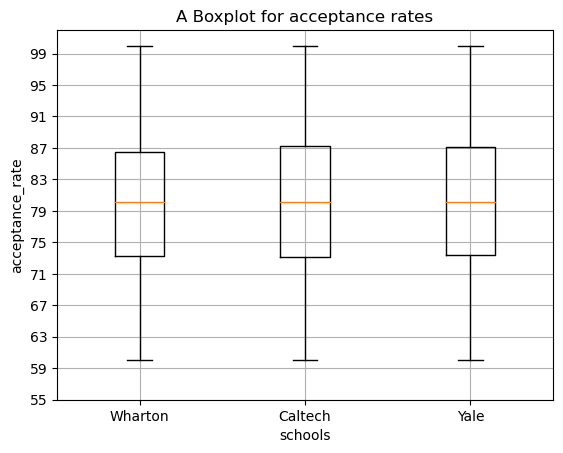

In [20]:
#2: Box Plot
'''

This boxplot illustrates the distribution of acceptance rates across three prestigious universities: Wharton, Caltech, and Yale.
For Wharton, the median acceptance rate spans from a lower range of 73% to an upper range of 86.9%, with an interquartile range of 13.8%.
Similarly, Caltech's median acceptance rate ranges from 73% to 87.1%, with an interquartile range of 14.1%. Yale exhibits a median acceptance rate ranging from 73% to 87%, with an interquartile range of 14%. 
By comparing the interquartile ranges, we find that the minimum interquartile range among these schools is 13.8% for Wharton.

'''

plt.boxplot([wharton_data['acceptance_rate'], caltech_data['acceptance_rate'], yale_data['acceptance_rate'] ], labels=['Wharton', 'Caltech', 'Yale'])
plt.yticks(range(55, 100, 4))
plt.xlabel('schools')
plt.ylabel('acceptance_rate')
plt.title('A Boxplot for acceptance rates')
plt.grid()
plt.show()


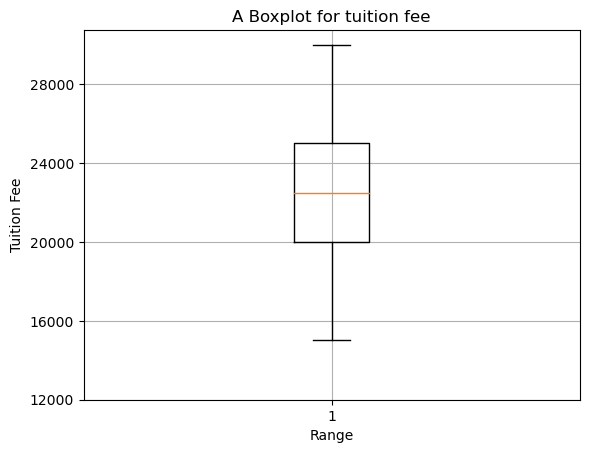

In [21]:
'''
This boxplot provides insights into the distribution of tuition fees for applications across three universities, namely Wharton, Caltech, and Yale, concerning the number of applications. 
Notably, the median tuition fee for all three institutions ranges from a lower limit of $20,000 to an upper limit of $25,000, with a central median value of approximately $22,500. 
The interquartile range, representing the spread of tuition fees within the boxplot, is calculated to be around $5,000. 
This depiction offers a clear overview of how tuition fees are dispersed across the dataset for these three schools.

'''

plt.boxplot(schooldata['tuition_fee'])
plt.yticks(range(12000, 32000, 4000))
plt.xlabel('Range')
plt.ylabel('Tuition Fee')
plt.title('A Boxplot for tuition fee')
plt.grid()
plt.show()

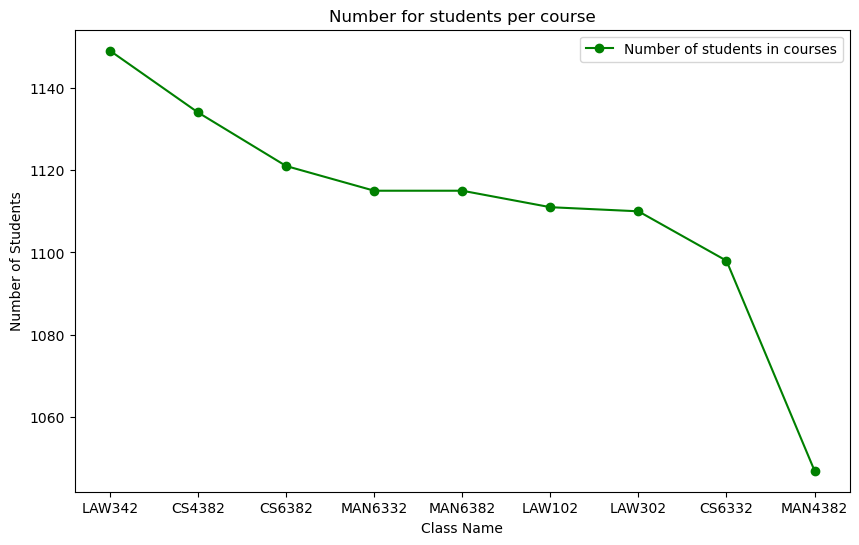

In [22]:
#3: Line Graph Plots
name_count= schooldata['name'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(name_count.index, name_count.values,marker='o', linestyle='-', color='g', label = 'Number of students in courses')
plt.title('Number for students per course')
plt.xlabel('Class Name')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

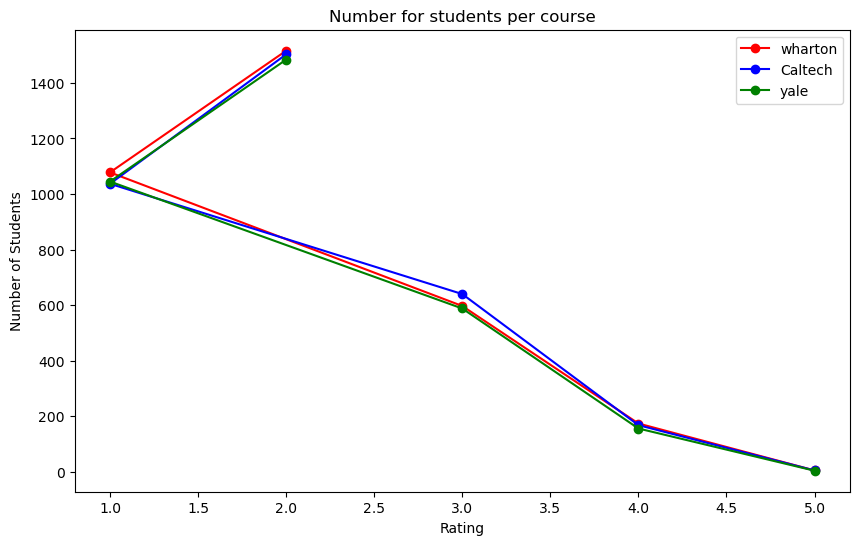

In [23]:

#wharton_count= schooldata['rating'].value_counts()
wharton_count= wharton_data['rating'].value_counts()
caltech_count= caltech_data['rating'].value_counts()
yale_count= yale_data['rating'].value_counts()
plt.figure(figsize=(10, 6))
#plt.plot(name_count.index, name_count.values,marker='o', linestyle='-', color='g')
plt.plot(wharton_count.index, wharton_count.values,marker='o', linestyle='-', color='r', label = 'wharton')
plt.plot(caltech_count.index, caltech_count.values,marker='o', linestyle='-', color='b',label = 'Caltech')
plt.plot(yale_count.index, yale_count.values,marker='o', linestyle='-', color='g',label = 'yale')
plt.title('Number for students per course')
plt.xlabel('Rating')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

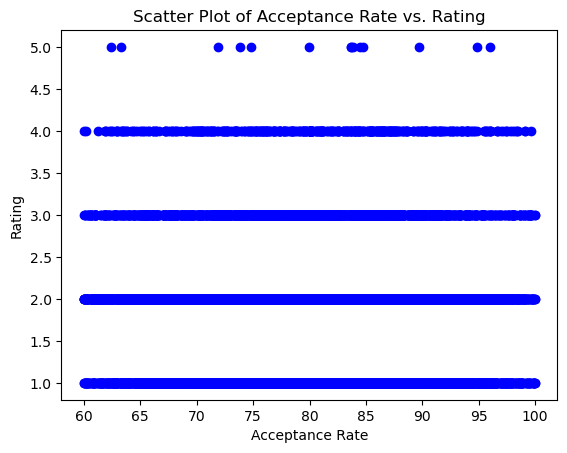

In [24]:
#4: ScatterPlot - 

plt.scatter (schooldata['acceptance_rate'],schooldata['rating'], color='blue')
plt.xlabel('Acceptance Rate')
plt.ylabel('Rating')
plt.title('Scatter Plot of Acceptance Rate vs. Rating')
plt.show()

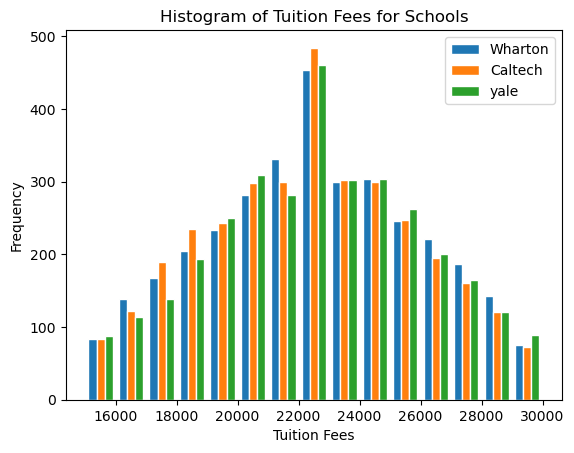

In [25]:
#5: Histogram A
'''

Histogram of tuition fees for schools
The histogram shows the distribution of tuition fees for schools in the United States. The x-axis shows the tuition fee in dollars, and the y-axis shows the frequency of students with that tuition fee.
The most common tuition fee is between $20,000 and $22,000, with over 450 students for each school. The next most common tuition fee is between $22,000 and $24,000, with over 900 schools charging this price.

'''
#colors = ['skyblue', 'lightgreen', 'lightcoral']
plt.hist([wharton_data['tuition_fee'],caltech_data['tuition_fee'],yale_data['tuition_fee']], bins=15, edgecolor='white', label=['Wharton', 'Caltech', 'yale'])
plt.xlabel('Tuition Fees')
plt.ylabel('Frequency')
plt.title('Histogram of Tuition Fees for Schools')
plt.legend()
plt.show()

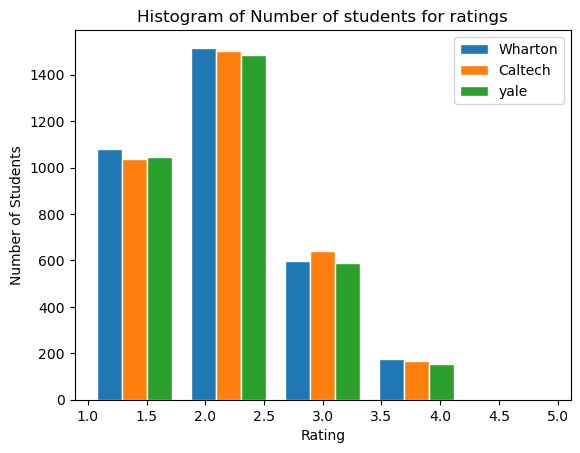

In [26]:

'''
Histogram for Number of Students distributed by rating and grouped by school name:
According to the Histogram - The applications with Rating 2 are highest in numbers and Rating 4 having the least no applications


'''


plt.hist([wharton_data['rating'],caltech_data['rating'],yale_data['rating']], bins=5, edgecolor='white', label=['Wharton', 'Caltech', 'yale'])
plt.xlabel('Rating')
plt.ylabel('Number of Students')
plt.title('Histogram of Number of students for ratings')
plt.legend()
plt.show()

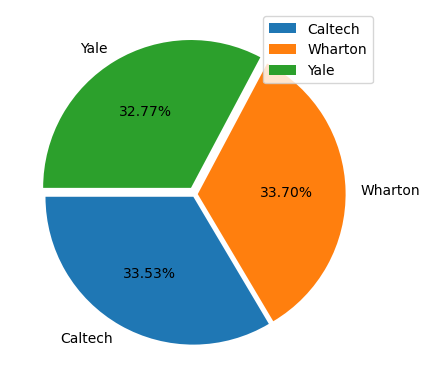

In [27]:
#6: Piechart

'''
This pie chart is used to visually represent the proportion of students enrolled in each institution.
The pie chart revealed a balanced distribution, showcasing the following percentages:
Yale: 33.53%
Wharton: 32.77%
Caltech: 33.70%

The insights gleaned from this analysis provide valuable information for understanding the enrollment patterns 
within the dataset and contribute to informed decision-making in educational contexts.

'''
#Setting variables for data count
Wharton_count = schooldata['school'].value_counts().get('Wharton', 0)
Yale_count = schooldata['school'].value_counts().get('Yale', 0)
Caltech_count = schooldata['school'].value_counts().get('Caltech', 0)

#colors = ['skyblue', 'lightgreen', 'lightcoral']
#slices=[3370,3277,3353]
plt.pie([Caltech_count, Wharton_count,Yale_count], labels = ['Caltech','Wharton','Yale'], explode = (0.02, 0.02, 0.05),
startangle=180,
radius = 1, autopct = '%2.2f%%')
plt.legend()

plt.show()
 


Text(0.5, 1.0, 'Heatmap for Acceptance Rates')

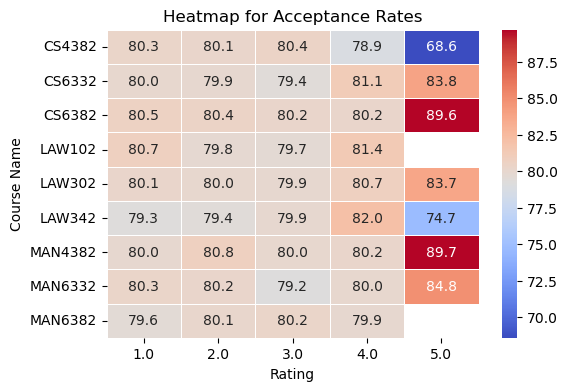

In [28]:
#7 Heatmap
'''
Heatmap : 
The heatmap shows the average acceptance rates for the courses, based on a sample of 10 law schools.
The highest acceptance rate is for MAN4382 at 5 rating for the school, with an acceptance rate of 89.7%. The lowest acceptance rate is for CS4382 at 5 rating for school, with an average acceptance rate of 79.6%.
The heatmap also shows that there is a general trend of increasing acceptance rates as the rating of the school increases. This is likely because higher-rated schools are more competitive and receive more applications.

'''
# Generate some random data for demonstration
import seaborn as sns
# Create a heatmap
heatmap_data = pd.pivot_table(schooldata, values='acceptance_rate', index='name', columns='rating')
 
#sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
#plt.imshow(school_data['tuition_fee'], cmap='viridis', interpolation='nearest')
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.heatmap(heatmap_data , cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
 
# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Course Name')
plt.title(f'Heatmap for Acceptance Rates')
 
# Show the plot
#plt.show()